# Gradient descent

This is a supplementary information notebook. None of this content needs to be reproduced for the course or the exam but questions could be asked about it during the exam.

In the introduction to linear regression we have seen that for a simple case, we could compute the error made a by a series of model using pairs of possible model parameters. In that case, we can just figure out which model (and thus which parameters) have the lowest error. But in reality, we can rarely do that an rely on searching the solution via gradient descent, i.e. we start from the yellow point and try to figure out where the minimum, the red dot is:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib widget

In [6]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

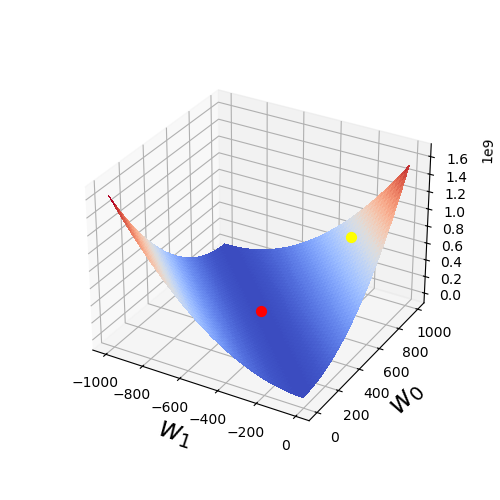

In [7]:
# create a grid of values for the parameters
w0_range = np.arange(-1000,0, 5)
w1_range = np.arange(0, 1000, 5)

grid_0, grid_1 = np.meshgrid(w0_range, w1_range)

# compute error for each point in the grid
grid_mult = grid_0[:,:,np.newaxis] + grid_1[:,:,np.newaxis] * wine['density'].values
grid_mult = (grid_mult - wine['fixed acidity'].values)**2
total_error = np.sum(grid_mult, axis=2)

#find minimal value
min_loc = np.unravel_index(np.argmin(total_error), total_error.shape)

fig = plt.figure(figsize=(5,5))

X = grid_0.copy()
Y = grid_1.copy()
Z = total_error.copy()

ax = fig.add_subplot(1, 1, 1, projection='3d',computed_zorder=False)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)#, vmax=5)

ax.scatter([grid_0[180, 150]],[grid_1[180, 150]], [total_error[180, 150]], c='yellow', s=50)
ax.scatter([grid_0[min_loc[0],min_loc[1]]],[grid_1[min_loc[0],min_loc[1]]], [total_error[min_loc[0],min_loc[1]]], c='red', s=50)

grid_1[min_loc[0],min_loc[1]]
ax.set_xlabel('$w_1$', fontdict={'fontsize':20})
ax.set_ylabel('$w_0$', fontdict={'fontsize':20});

How do we now reach the bottom of the valley from this point? It's also important to remember that we don't *see* the whole surface. It's as if we were on a snowy mountain in the fog: we see a few meters from our current position and the only information we have is the direction of the slope.

To simplify things, let's just look at a 1d example where our error as a function of a single parameter $w_0$ looks like a parabola: $e = x^2$ where $e$ is the error and $x$ the single parameter of the model. Here again we want to find the bottom of the valley. Let's also start from a random point (red), here chosen as $w_0 = 7.5$:

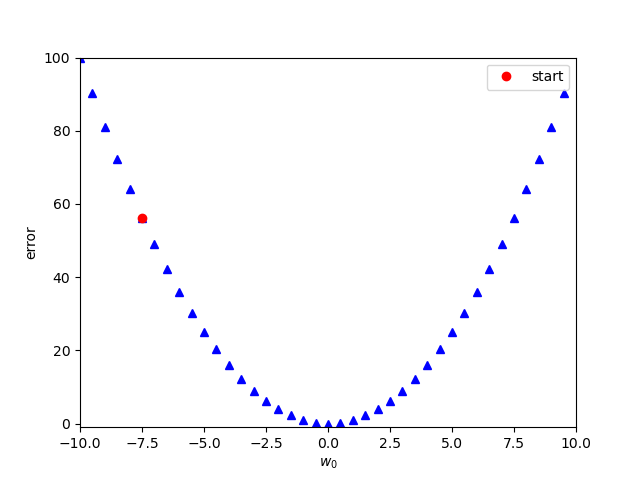

In [8]:
def parabola(x):
    return x**2

w0_range = np.arange(-10, 10, 0.5)
error = parabola(np.arange(-10, 10, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error,'b^')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We can now slide along the slope until we find the bottom. Again remember that we don't "see" the whole curve, and therefore at this moment we only see our current position:

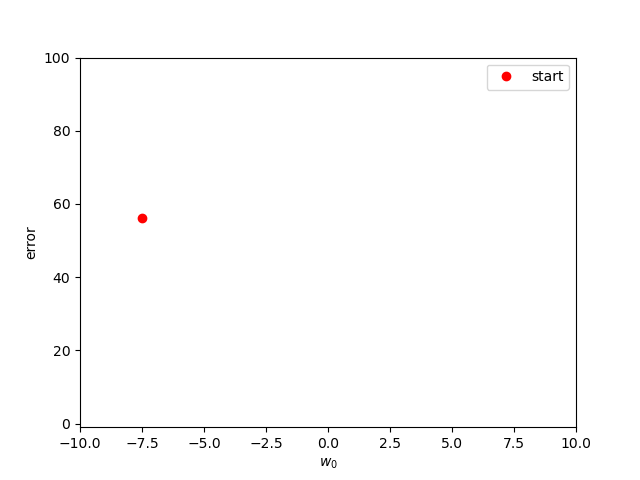

In [9]:
w0_range = np.arange(-7.5, -7.5, 0.5)
error = parabola(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

What we can do is slightly vary the value of our current choice of $w_0$ and estimate the error. This would give us the following information. Let's create two points around $w_0=-7.5$

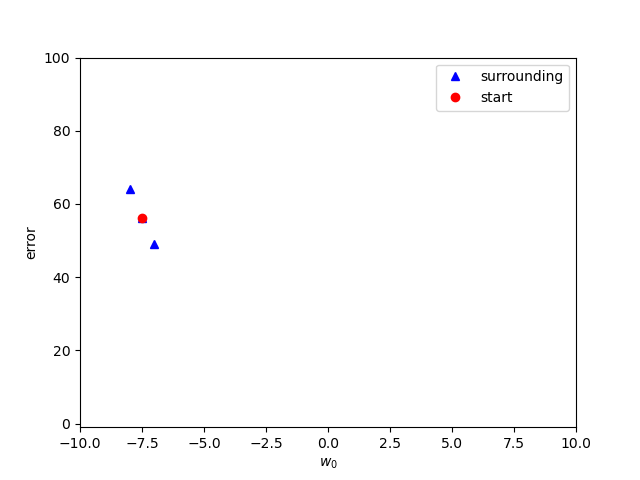

In [10]:
w0_range = np.arange(-8, -6.5, 0.5)
error = parabola(np.arange(-8, -6.5, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We now have our current point, plus some information on the local surroundings. In particular we see now in which direction we should go to decrease the error: to the right, i.e. larger values of $w_0$.

If we want to follow the slope, we can just estimate it by drawing a line between the close-by points: 

In [11]:
slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])
slope

-15.0

With this we know that if we move to the right, i.e. use **larger $w_0$ values**, since the **slope is negative**, the **error will decrease**. If at some point the slope becomes positive, it means that we have to move to the left, i.e. make $w_0$ smaller. So we can use the slope to update the value of $w_0$. We can say that $w_0^{new} = w_0 - lr * slope$ with ```lr``` some multiplicative factor e.g. 0.1. Therefore:

In [12]:
w_0_new = -7.5 - slope * 0.1

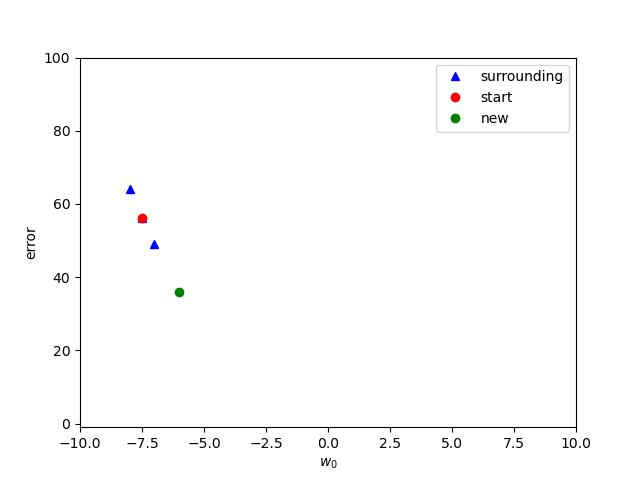

In [13]:
w0_range = np.arange(-8, -6.5, 0.5)
error = parabola(np.arange(-8, -6.5, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We have moved in the right direction! Now we can repeat the operation. Compute surrounding points, the local slope and update the value of $w_0$:

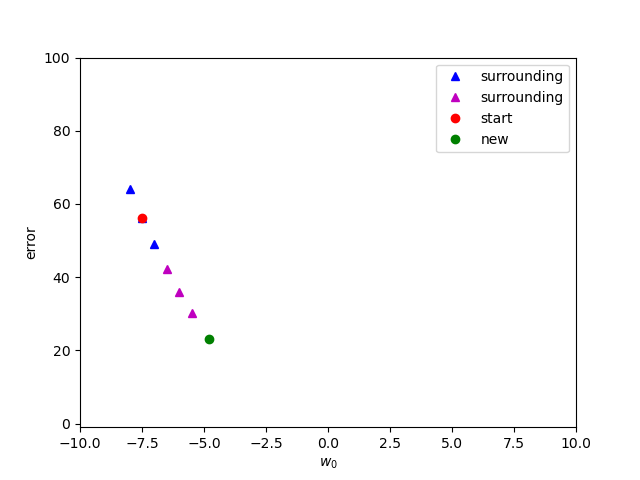

In [14]:
w0_range2 = np.arange(w_0_new-0.5, w_0_new+0.6, 0.5)
error2 = parabola(w0_range2)
slope = (error2[-1]-error2[0]) / (w0_range2[-1]-w0_range2[0])

w_0_new = w_0_new - slope * 0.1

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot(w0_range2, error2, 'm^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We can repeat now the operation until we reach the bottom of the valley. Notice that when we reach to bottom, the slope should be close to zero and therefore we should stop moving automatically! We can plot the entire series of updated values for $w_0$:

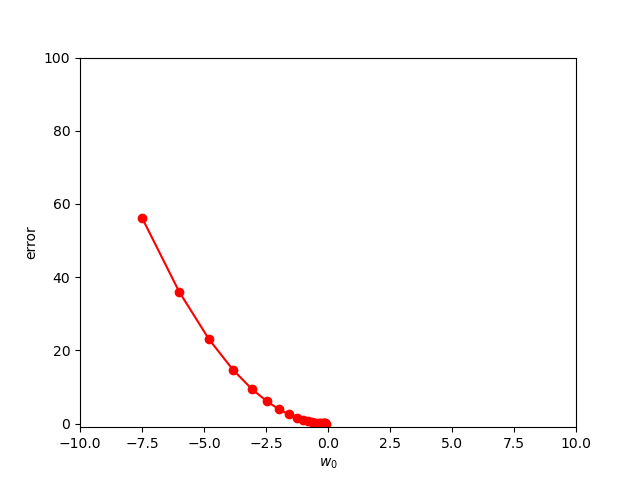

In [15]:
fig, ax = plt.subplots()
w_0_vals = [-7.5]
error_vals = [parabola(w_0_vals[0])]
for i in range(20):
    
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = parabola(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.1
    w_0_vals.append(w_0_new)
    error_vals.append(parabola(w_0_new))

ax.plot(w_0_vals, error_vals, 'ro-');

ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

We clearly reach the bottom and we also clearly see that when the slope decreases, the steps we take keep getting smaller.

This type of method where we use the local slop to search for the minimum is called **gradient descent**. The gradient is a general term for slope in the case where we deal with more than one variable (like in the surface shown previously) and descent means going down. There are many ways to computer the slope, update the parameters etc. and we won't go into such details. The important idea here is that we use the local slope information to reach a global minimum. Most of the time you will hear about Stochastic Gradient Descent (SGD) which uses this approach but where only a fraction of the data are used at each iteration. This is particularly relevant when using very large amounts of data.

## Potential problems

When using any type of Machine Learning algorithm, one has to know about its limitations and typical pitfalls. Some of them are common to many algorithms and some are method specific.

### Initial conditions

When we executed the fit with the standard linear regression, we could just use ```res = model.fit(X=X, y=y)``` but when we used the gradient descent method above, we had to use
```res = model.fit(X=X, y=y, coef_init=600, intercept_init=-600)```, i.e. we had to manually specify a starting point with ```coef_init``` and ```intercept_init```. This is because unlike the standard method, gradient descent actually *searches* for a solution, and if we start too far away, we might never find it. Let's try without:

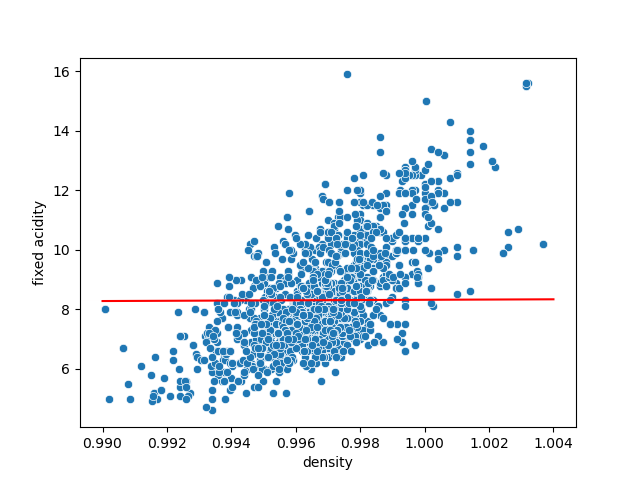

In [18]:
from sklearn.linear_model import SGDRegressor

X = wine[['density']]
y = wine['fixed acidity']

model = SGDRegressor()
res = model.fit(X=X, y=y)

fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

Clearly gradient descent didn't find the correct solution. There are mainly two reasons that could explain this: we didn't do enough steps or the algorithm found another "not too bad" solution and couldn't escape it.

We can try to adjust the number of iterations:

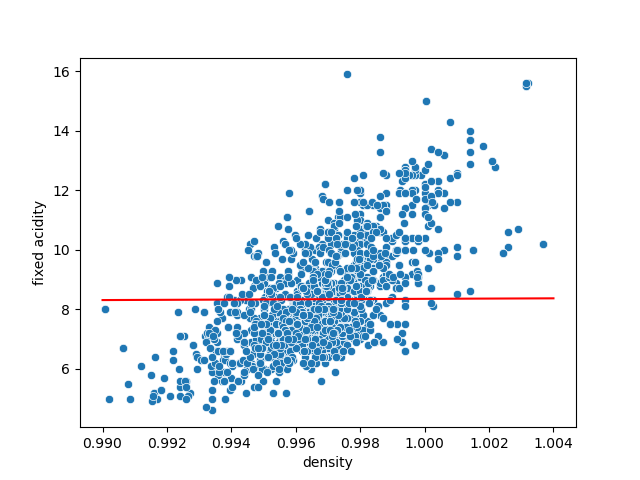

In [19]:
model = SGDRegressor(max_iter=10000)

fig, ax = plt.subplots()
res = model.fit(X=X, y=y)
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

It doesn't seem to do much to solve our problem, so we are probably trapped in some local minimum. To understand this, let's imagine that our 1D erro plot looks like this:

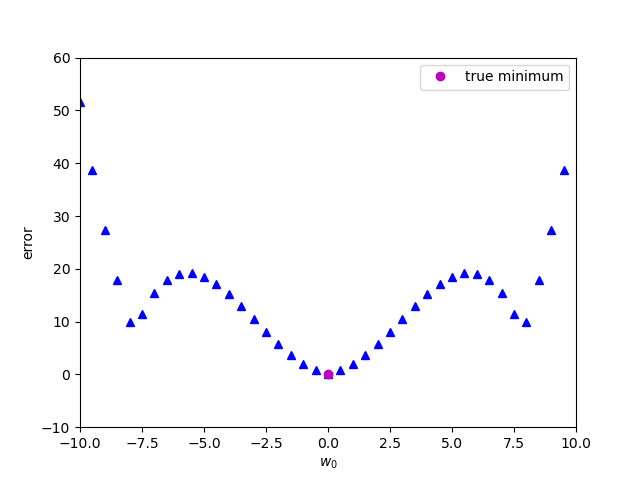

In [20]:
w0_range = np.arange(-10, 10, 0.5)
def error_fun(x):
    return x**2 * np.abs(np.cos(4*x/20)) + np.abs(x)/1
error = error_fun(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], error_fun(np.array([0])), 'mo', label='true minimum');
#ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-10,60], xlabel='$w_0$', ylabel='error')
ax.legend();

If we start our search too for on the left or the right and follow the slope, we will end up in one of the local minima. For example, if we start at $w_0 = -6$ we will end up in the local minimum on the left:

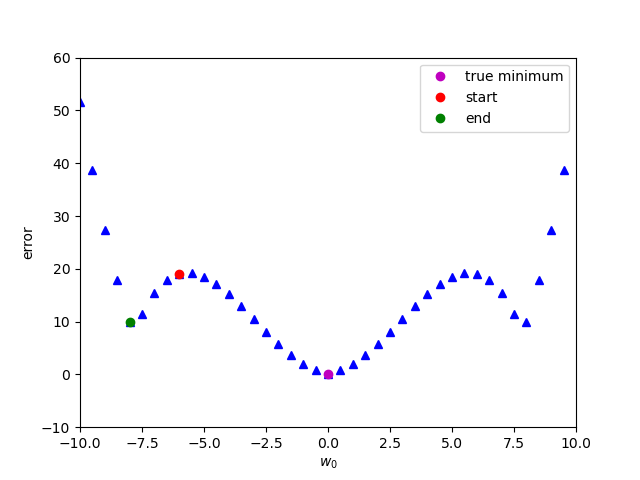

In [21]:
fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], [0], 'mo', label='true minimum');
ax.plot([-6], [error_fun(-6)], 'ro', label='start');
ax.plot([-8], [error_fun(-8)], 'go', label='end');
ax.set(xlim=[-10,10], ylim=[-10,60], xlabel='$w_0$', ylabel='error')
ax.legend();

So in this case we would have to specify an initial conditions e.g. $w_0=-5$. Note that there are alternatives to take care of this. For example one can run the optimization several times from different initial points and keep the *lowest* minium, or one can add some noise at each step to help the optimizer get over small "hills".

### Flat gradient

As we use the gradient to reach the minimum, if the error curve is flat *somewhere else* than at the true minimum, it can start to wander randomly as there is no slope anymore to follow. This would be the case for example with an error like this: 

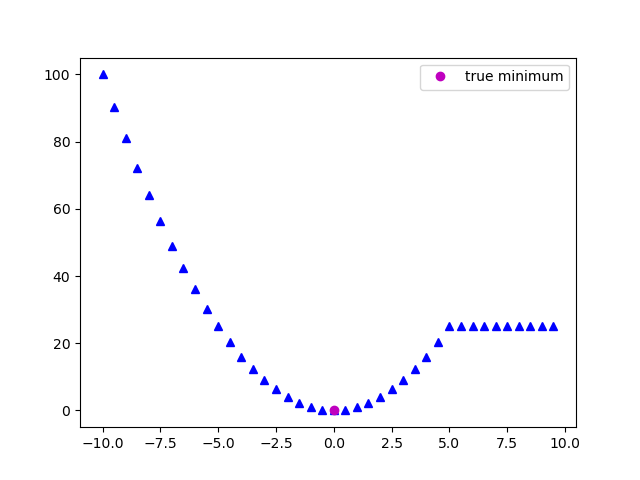

In [22]:
w0_range = np.arange(-10, 10, 0.5)
def error_fun(x):
    out = x**2
    out[x > 5]=25
    return out
error = error_fun(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], error_fun(np.array([0])), 'mo', label='true minimum');
#ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
#ax.set(xlim=[-10,10], ylim=[-10,20], xlabel='$w_0$', ylabel='error')
ax.legend();

If we start here around $w_0=7.5$ for example, the slope is zero and therefore the step to compute the new parameter value $w_0^{new} = w_0 - lr * slope$ is zero: we don't converge to the solution.

### Over-shooting solution

The *learning rate* parameter we have in $w_0^{new} = w_0 - lr * slope$ is very important in that it dictates how big we want the step to be. If it is too small, then it will take for ever to find the solution. If it is too large, there's a risk that we miss the solution because we move too fast. For example if we use again our loop above but use a larger learning rate, then sequence of steps is:

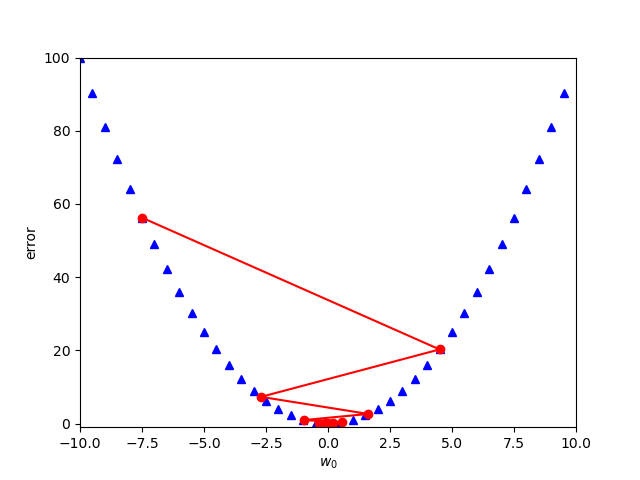

In [23]:
fig, ax = plt.subplots()

w0_range = np.arange(-10, 10, 0.5)
error = parabola(np.arange(-10, 10, 0.5))
ax.plot(w0_range, error,'b^')

w_0_vals = [-7.5]
error_vals = [parabola(w_0_vals[0])]
for i in range(20):
    
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = parabola(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.8
    w_0_vals.append(w_0_new)
    error_vals.append(parabola(w_0_new))

ax.plot(w_0_vals, error_vals, 'ro-');

ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

We see that we finally still converge to the solution, but we hop from one side to the other of the error plot. In case we had a local minimum because we loop at a simple parabola, but for more complex landscape we might never find the minimum. For example with the function used before with local minima we could get something not converging:

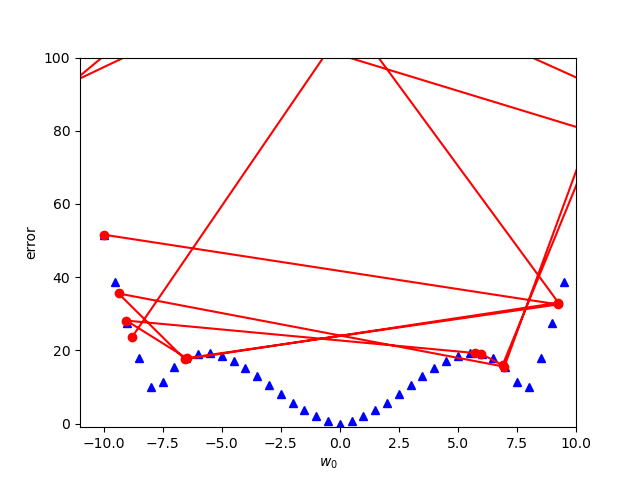

In [24]:
def error_fun(x):
    return x**2 * np.abs(np.cos(4*x/20)) + np.abs(x)/1

fig, ax = plt.subplots()

w0_range = np.arange(-10, 10, 0.5)
error = error_fun(np.arange(-10, 10, 0.5))
ax.plot(w0_range, error,'b^')

w_0_vals = [-10.]
error_vals = [error_fun(w_0_vals[0])]
for i in range(20):
    
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = error_fun(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.7
    w_0_vals.append(w_0_new)
    error_vals.append(error_fun(w_0_new))

ax.plot(w_0_vals, error_vals, 'ro-');

ax.set(xlim=[-11,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

## Considerations

We have seen only a tiny fraction of existing linear regression methods. However these simple examples have allowed us to learn fundamental concepts:
- metrics: how do we measure the quality of our model. In this case we used the sum of squared errors
- gradient descent: using the local slope to find the minimum in the error and therefore the best parameters
- potential pitfalls like vanishing gradients (no slope), learning rate etc.

Note that all these concept will reappear in other methods, in particular in the most advanced ones like Deep Learning.